# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

### Preprocessing the Training set

### Preprocessing the Test set

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Normalize pixel values
X_train /= 255
X_test /= 255

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 [==============================] - 0s 0us/step


## Part 2 - Building the CNN

### Initialising the CNN

In [3]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [4]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))

Using a 3x3 kernel with 32 filters. The input shape is [28, 28, 1] because MNIST images are 28x28 pixels with 1 channel (grayscale).

### Step 2 - Pooling

In [5]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [7]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [8]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [9]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [10]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [11]:
cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=32)

Epoch 1/25
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1300 - accuracy: 0.9597 - val_loss: 0.0503 - val_accuracy: 0.9834
Epoch 2/25
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0423 - accuracy: 0.9870 - val_loss: 0.0351 - val_accuracy: 0.9897
Epoch 3/25
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0280 - accuracy: 0.9910 - val_loss: 0.0355 - val_accuracy: 0.9899
Epoch 4/25
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0339 - val_accuracy: 0.9904
Epoch 5/25
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0155 - accuracy: 0.9947 - val_loss: 0.0278 - val_accuracy: 0.9914
Epoch 6/25
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0120 - accuracy: 0.9962 - val_loss: 0.0359 - val_accuracy: 0.9906
Epoch 7/25
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0103 - accuracy: 0.9965 - val_loss: 0.0357 -

## Part 4 - Making a single prediction

1/1 [==============================] - 0s 29ms/step


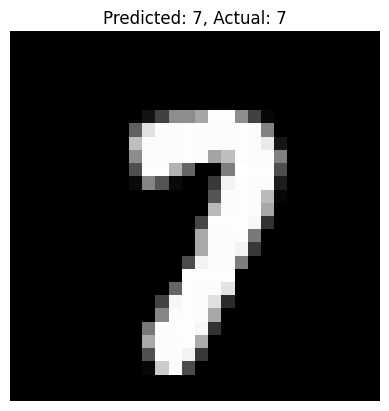

The predicted digit is: 7
The actual digit is: 7


In [13]:
import numpy as np
import matplotlib.pyplot as plt

index = np.random.randint(0, len(X_test))
test_image = X_test[index]
test_label = y_test[index]

input_image = np.expand_dims(test_image, axis=0)

result = cnn.predict(input_image)
predicted_digit = np.argmax(result)
actual_digit = np.argmax(test_label)

plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_digit}, Actual: {actual_digit}")
plt.axis('off')
plt.show()

print(f"The predicted digit is: {predicted_digit}")
print(f"The actual digit is: {actual_digit}")